In [274]:
#      o----/\/\/\----|----/\/\/\----|----/\/\/\----|----/\/\/\----|
#                     |              |              |              |
#                     /              /              /              /
#                     \              \              \              /
#                     /              /              /              /
#                     |              |              |              |
#      o----/\/\/\----|----/\/\/\----|----/\/\/\----|----/\/\/\----|

#                 |----/\/\/\----|----/\/\/\----|----/\/\/\----|----/\/\/\----o
#                 |              |              |              |
#                 /              /              /              /
#                 \              \              \              \
#                 /              /              /              /
#                 |              |              |              |
#  o----/\/\/\----|----/\/\/\----|----/\/\/\----|----/\/\/\----|

In [272]:
import numpy as np  #Importing NumPy
import math
import matplotlib.pyplot as plt
import random
from ipynb.fs.defs.FrictionFactors import Fhal, Ffan, Rep, Pfrac, Qfrac, Pperf, pplots, Qfdarcy, Pfdarcy

In [273]:
import platform
is_windows = any(platform.win32_ver())
if is_windows==True:
    path=r'C:\Users\prana\Google Drive (u1011561@gcloud.utah.edu)\PhD\Geothermal\AnalyticalModel\Images'
else:
    path=r'/Users/asai/Google Drive (u1011561@gcloud.utah.edu)/PhD/Geothermal/AnalyticalModel/Images/'

In [275]:
#Activate Perforation
pact=1   #If 0, perforation pressure drop is zero.
#Direction of well
dircn=0  #If 1, the wells are counter parallel
#Variable Permeablity
premact=0 #If 0, All fractures have same permeability
#Adaptive Perf Dia
pfdia=0 #If 0, Adaptive dia is off.
#Angular wells
d1=0 #Enter the difference between the first and last fracture size

In [276]:
#For Fracture
n=3 #Number of Fractures
wlen=450 #m, Length of the well
Kb=1e-12 #m2, #Fracture base Permebility
breadth=100 #m Fracture entrance length
Wpseudo=5.0 #m Fracture entrance pseudo width
Lf0=100 #m Base Lenght of fractures

#For Pipe
Dinj=0.1778#524   #m Diameter of the Injection Pipe
Dpro=0.1778#524   #m Diameter of the Production Pipe
Ainj=math.pi*Dinj**2*0.25 #meters sq.
Apro=math.pi*Dinj**2*0.25 #meters sq.
den=1000 #kg/s
e=0.015/1000  #roughness in m
Li0=wlen/n #m Length of Inj pipe section
Lp0=wlen/n #m Length of Prod pipe section
ang1=math.atan((d1/2)/((n-1)*Li0)) #Angle of Injection well
ang2=math.atan((d1/2)/((n-1)*Li0)) #Angle of Production well

#For Perforation
lenperf=1 #ft, length og each perf zone
Cd=0.75 #Discharge Coefficient
Nppl=6 # Number of perforations per foot
Np=lenperf*Nppl #Number of Perforations
DPinj0=0.009525#*0.25 #m, Diameter of perforations
DPpro0=0.009525#*0.25 #m, Diameter of perforations
Dp0=0.009525#*0.25 #m, Diameter of perforations
print(math.degrees(ang1)*2)

0.0


In [277]:
#Initialization
Pi=np.zeros(n+1)
Po=np.zeros(n+1)
Pf=np.zeros(n)
q=np.zeros(n)
Lf=np.zeros(n)
Li=np.zeros(n+1)
Lp=np.zeros(n+1)
Wf=np.zeros(n)
Kf=np.zeros(n)
Af=np.zeros(n)
DPinj=np.zeros(n)
DPpro=np.zeros(n)
Dp=np.zeros(n)
Tp=np.zeros(n)

In [278]:
#Calculate fracture length and pipe length and set permeabilities
for i in range(n):
    Af[i]=Wpseudo*breadth
    if premact==0:
        Kf[i]=Kb
        
    else:
        rndnum=(random.uniform(1, 10))
        rndnum1=(random.choice([-1, 0, 1]))  #Magnitude
        Kf[i]=rndnum*Kb*(10**rndnum1)

In [280]:
#Calculate Perforations

#Calculating Geometric mean of fractures
GMean = math.prod(Kf)**(1/len(Kf))

for i in range(n):
    if premact==0:
        if pfdia==1:
            DPinj[i]=((i+2)**0.2/n**0.14)*DPinj0 #The inittial term is penalty for location
            DPpro[i]=((i+2)**0.2/n**0.14)*DPpro0 #The inittial term is penalty for location
        else:
            DPinj[i]=DPinj0
            DPpro[i]=DPpro0
            #Tp[i]=((i+1)**0.3/n**0.3)*Dp0
    else:
        if pfdia==1:
            DPinj[i]=DPinj0*(1.3**(math.log(GMean/Kf[i],10)))
            DPpro[i]=DPinj0*(1.3**(math.log(GMean/Kf[i],10)))
        else:
            DPinj[i]=DPinj0
            DPpro[i]=DPpro0
            #Tp[i]=((i+1)**0.2/n**0.3)*Dp0/(rndnum)**2
#print(Kf)

In [296]:
#Flow Rate and Pressure
Qi=15 #kg/s
Pi[0]=8e7

In [297]:
for i in range(n):
    q[i]=Qi/n
    Lf[i]=abs(Lf0+(n-i-1)*math.tan(ang1)*Li0+(n-i-1)*math.tan(ang2)*Lp0)
for i in range(n+1):
    Li[i]=Li0/math.cos(ang1)
    Lp[i]=Lp0/math.cos(ang2)

In [298]:
qc=Qi/1000
m=500 #number of iterations
mmax=5000 #max number of iterations
tol=1e-10 #Tolerance
for j in range(m):
    
    #pressure drop in injection well
    for i in range(n):
        Pi[i+1]=Pi[i]-Fhal(e,Dinj,Rep(qc,Dinj))*2*Li[i+1]*den*(qc/Ainj)**2/Dinj
        qc=qc-q[i]/1000
    #Pressure drop in Production well
    qc=q[n-1]/1000
    if dircn==0:
        #pressure drops in last Fracture
        if pact==1: #Activated perforation drop
            Po[n]=Pi[n]-Pfdarcy(q[n-1]/1000,Lf[n-1],Af[n-1],Kf[n-1])-Pperf(q[n-1]/1000,Cd,Np,DPinj[n-1])-Pperf(q[n-1]/1000,Cd,Np,DPpro[n-1])
        else:    
            Po[n]=Pi[n]-Pfdarcy(q[n-1]/1000,Lf[n-1],Af[n-1],Kf[n-1])
        for i in range(n,0,-1):
            Po[i-1]=Po[i]-Fhal(e,Dpro,Rep(qc,Dpro))*2*Lp[i-1]*den*(qc/Apro)**2/Dpro
            qc=qc+q[i-1]/1000
        #Flow Rate in all Fractures
        qt=0
        for i in range(n):
            Pf[i]=Pi[i+1]-Po[i+1]
            
            #q[i]=Qfdarcy(Pf[i],Lf[i],Af[i],Kf[i])*1000
            q[i]=Qfrac(Pf[i],Lf[i],Af[i],Kf[i],Cd,Np,DPinj[i],DPpro[i])*1000
            qt=qt+q[i]
    else:
        #pressure drops in First Fracture
        if pact==1: #Activated perforation drop
            Po[0]=Pi[1]-Pfdarcy(q[0]/1000,Lf[0],Af[0],Kf[0])-Pperf(q[0]/1000,Cd,Np,DPinj[0])-Pperf(q[0]/1000,Cd,Np,DPpro[0])
        else:    
            Po[0]=Pi[1]-Pfdarcy(q[0]/1000,Lf[0],Af[0],Kf[0])
        for i in range(0,n):
            Po[i+1]=Po[i]-Fhal(e,Dpro,Rep(qc,Dpro))*2*Lp[i-1]*den*(qc/Apro)**2/Dpro
            qc=qc+q[i-1]/1000
        #Flow Rate in all Fractures including perf
        qt=0
        for i in range(n):
            Pf[i]=Pi[i+1]-Po[i+1]
            q[i]=Qfrac(Pf[i],Lf[i],Af[i],Kf[i],Cd,Np,DPinj[i],DPpro[i])*1000
            qt=qt+q[i]
    #Calculating flowrate for next iteration
    for i in range(n):
        q[i]=(Qi)*q[i]/qt
    if abs(sum(q)-Qi>tol) and m<mmax:
        m=m+1

print(m)

500


[32.63202037 32.13320713 35.2347725 ]


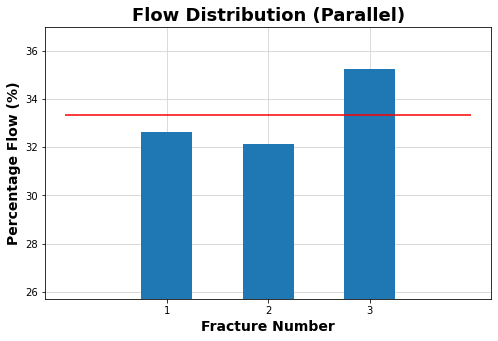

Friction Head= 95.28113462491 m
Del P= 0.9337551193241179 MPa
Del P= 135.42997499653143 psi


In [299]:
#Flow Distribution
distpct=np.empty(n)
temp=np.empty(n)
plt.figure(figsize = (8,5))
# set width of bar
barWidth = 1*(n-1)/(n+1)

for i in range(0,n):
    distpct[i]=100*(q[i]/sum(q))
x = np.linspace(1, n, n)
pmin=min(distpct)
pmax=max(distpct)
plt.ylim(ymin=pmin*0.8)
plt.ylim(ymax=pmax*1.05)
plt.hlines(100/n, 0, n+1, colors='r', linestyles='solid',zorder=3)              
plt.bar(x,distpct,width=barWidth,zorder=2)
# Add xticks on the middle of the group bars
plt.xticks(np.arange(1, n+1, step=1))
plt.xlabel('Fracture Number', fontweight='bold',fontsize=14)
plt.ylabel('Percentage Flow (%)', fontweight='bold',fontsize=14)
if dircn==0 and d1==0:
    plt.title('Flow Distribution (Parallel)', fontweight='bold',fontsize=18)
elif dircn==1 and d1==0:
    plt.title('Flow Distribution (Anti-Parallel)', fontweight='bold',fontsize=18)
elif dircn==0 and d1!=0:
    plt.title('Flow Distribution (Non-Parallel)', fontweight='bold',fontsize=18)
else:
    plt.title('\nFlow Distribution in Fractures', fontweight='bold',fontsize=18)
#plt.legend(loc="upper center",ncol=3,bbox_to_anchor= (0.5, -0.15),prop={'size': 12},frameon=True)
plt.grid(which='major', axis='both',color='lightgrey',zorder=1)
plt.savefig(r'%s/1.png' %path, bbox_inches='tight')
print(distpct)
plt.show()
print("Friction Head= "+str((max(Pi)-min(Po))/(9.8*1000))+" m")
print("Del P= "+str((max(Pi)-min(Po))/1e6)+" MPa")
print("Del P= "+str(145.038*(max(Pi)-min(Po))/1e6)+" psi")

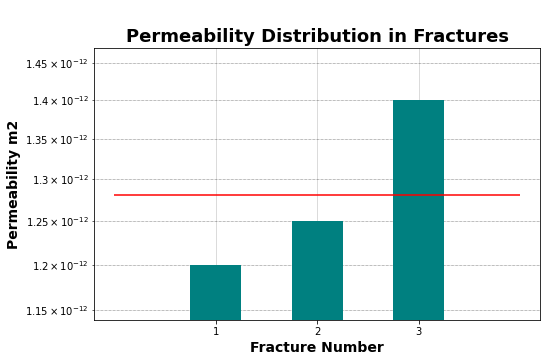

In [248]:
pplots(Kf,n,"Permeability","yes",path)